# Exploring Sex in Heart Disease

The goal of this kernel is to explore the roles of sex on heart disease, using the UCI Heart Disease dataset.

Here are the columns of the UCI Heart Disease dataset:
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholesterol in mg/dl 
> 6. fasting blood sugar > 120 mg/dl 
> 7. resting electrocardiographic results (values 0,1,2) 
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. old peak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by fluoroscopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 

## Importing Dataset and Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
print(os.listdir("../input"))
data = pd.read_csv('../input/heart-disease-uci/heart.csv')

['heart-disease-uci']


Renaming weirdly named columns:

In [3]:
data = data.rename(columns={'cp':'chest pain type','trestbps':'resting blood pressure',
                    'chol':'serum cholestrol','fbs':'fasting blood sugar',
                    'restecg':'resting electro','thalach':'max heart rate',
                    'exang':'exercise induced angina','oldpeak':'ST depression',
                    'ca':'colored vessels'})

In [4]:
data.head()

,age,sex,chest pain type,resting blood pressure,serum cholestrol,fasting blood sugar,resting electro,max heart rate,exercise induced angina,ST depression,slope,colored vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Establishing Importance of Sex in Determining Diagnosis

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop('target',axis=1),data['target']
                                                 ,test_size=0.3)
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

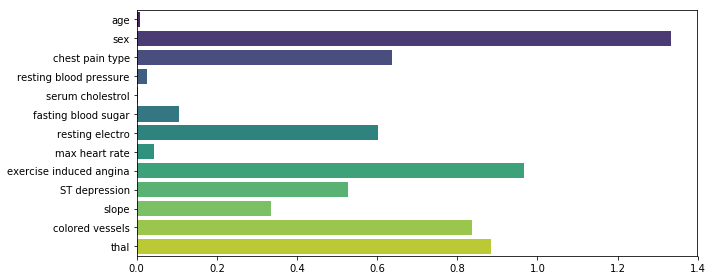

In [6]:
fig = plt.figure(figsize=(10,4))
sns.barplot(x = abs(log.coef_[0]),y=data.columns.drop('target'),palette = 'viridis')
plt.tight_layout()

It seems that sex has the largest say in deciding if a patient has heart disease or not. Let's standardize these variables just to confirm this, as the binary nature of the sex variable may have influenced the coefficient value.

In [7]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
standard = pd.DataFrame(scaler.fit_transform(data))
standard.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0.914529


In [8]:
create_dic = {}
columns = list(data.columns)
for i in range(len(columns)):
    create_dic[columns[i]] = standard.loc[i]

In [9]:
sdata = pd.DataFrame(create_dic)
sdata.head()

,age,sex,chest pain type,resting blood pressure,serum cholestrol,fasting blood sugar,resting electro,max heart rate,exercise induced angina,ST depression,slope,colored vessels,thal,target
0,0.952197,-1.915313,-1.474158,0.180175,0.290464,0.290464,0.180175,-1.143291,-0.260980,0.290464,-0.040403,-0.702136,-0.591847,1.062485
1,0.681005,0.681005,-1.468418,0.681005,-1.468418,0.681005,-1.468418,0.681005,0.681005,0.681005,0.681005,-1.468418,0.681005,0.681005
2,1.973123,1.002577,0.032031,0.032031,-0.938515,-0.938515,0.032031,0.032031,1.002577,1.002577,-0.938515,1.002577,0.032031,1.973123
3,0.763956,-0.092738,-0.092738,-0.663867,-0.663867,0.478391,0.478391,-0.663867,2.306004,1.049520,0.478391,-0.092738,-0.092738,-1.234996
4,-0.256334,0.072199,-0.816773,-0.198357,2.082050,-1.048678,0.922521,0.323431,-0.913400,-1.512490,-0.140381,0.555337,0.381407,-0.681494


In [10]:
sX_train,sX_test,sy_train,sy_test = train_test_split(data.drop('target',axis=1),
                                                 data['target'],test_size=0.3)
slog = LogisticRegression()
slog.fit(sX_train,sy_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

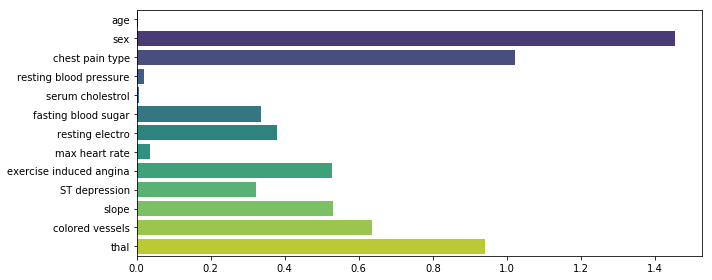

In [11]:
fig = plt.figure(figsize=(10,4))
sns.barplot(x = abs(slog.coef_[0]),y=data.columns.drop('target'),palette = 'viridis')
plt.tight_layout()

It definitely has the highest say in the model, definitely coming close with a couple columns, but let's focus on the sex column. There's still some hesitance - is the regression model representative of the data?
Let's look at the model performance.

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,log.predict(X_test)))
print(confusion_matrix(y_test,log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74        32
           1       0.86      0.85      0.85        59

    accuracy                           0.81        91
   macro avg       0.79      0.80      0.80        91
weighted avg       0.81      0.81      0.81        91

[[24  8]
 [ 9 50]]


That's not too bad. We can say that the coefficient results are reasonably accurate.

## Which sex is more likely to get heart disease?

We can get this by looking at the coefficient for the sex column. 

In [13]:
coeffs = pd.Series(log.coef_[0],list(data.columns[:-1]))
coeffs['sex']

-1.3324925285430553

The coefficient for sex is about -1.77. The 'sex' column has a 1 for male and 0 for female. The closer the final diagnosis is to 1, there is a higher chance of heart disease. 
Using a little bit of reasoning, we can figure out that males have a smaller chance of having heart disease.

**Logic:**
Holding all other variables fixed but changing the sex variable, we have:

Male - 1. Multiplying by the coefficient: -1.77

Female - 0. Multiplying by the coefficient: 0

Plugging in the sigmoid function:

Male - (e^(-1.77)) / (1 + e^(-1.77) = 0.145542329

Female - (e^(0)) / (1 + e^(0)) = 0.5

Females have a 3.5 times higher chance of having heart disease than males, holding all other variables fixed.

Of course, we didn't account for other variables. Due to the sigmoid function, we know that the difference will vary based on the features excluding sex. However, we can safely say that due to the sigmoid transformation of the linear regression equation, **women will always have a higher chance of heart disease than men, holding all other variables fixed.**

These findings are confirmed by numerous scientific findings.

## Creating Interface for Finding Effects of Sex

Goal: To create an interface to find the effects of sex, holding all variables fixed. The input will be all the variables besides sex.

In [14]:
def run_interface():
    age = float(input('Age: '))
    cpt = float(input('Chest pain type: '))
    rbp = float(input('Resting blood pressure: '))
    sc = float(input("Serum cholestrol: "))
    fbs = float(input("Fasting blood sugar > 120 md/dl: "))
    res = float(input("Resting electrocardiographic results: "))
    mhra = float(input("Maximum heart rate achieved: "))
    eia = float(input("Exercise induced agina: "))
    op = float(input("ST depression induced by exercise: "))
    spe = float(input("Slope of peak exercise ST segment: "))
    mv = float(input("# of major vesels colored by fluoroscopy: "))
    thal = float(input("Thal value: "))
    
    sex_vals = [1.0,0.0]
    pred_vals = []
    
    for sex in sex_vals:
        pred = log.predict_proba(np.array([age,sex,cpt,rbp,sc,fbs,res,mhra,eia,
                                          op,spe,mv,thal]).reshape(1,-1))
        pred_vals.append(pred[0][1])
        
    print("_____________________________________________________________________\n")
    print("Probabilities indicate the chance of having heart disease.")
    print("All variables were kept the same, except for sex.")
    print("Male: {}".format(pred_vals[0]))
    print("Female: {}".format(pred_vals[1]))
    print("\nHolding all variables fixed, females have a {} times higher chance of having heart disease than males.".format(pred_vals[1]/pred_vals[0]))

Let's get some real data and see if the interface works.

Note: The inputs in the interface do not match with the ones called because the train test split that creates X_train differs every time. Assume that at the time the image was created, the X_train values align with the ones manually entered.

In [15]:
X_train.iloc[34]

age                         58.0
sex                          1.0
chest pain type              1.0
resting blood pressure     120.0
serum cholestrol           284.0
fasting blood sugar          0.0
resting electro              0.0
max heart rate             160.0
exercise induced angina      0.0
ST depression                1.8
slope                        1.0
colored vessels              0.0
thal                         2.0
Name: 172, dtype: float64

In [16]:
run_interface()

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

Since Kaggle doesn't support input requests,here is an image of the interface:
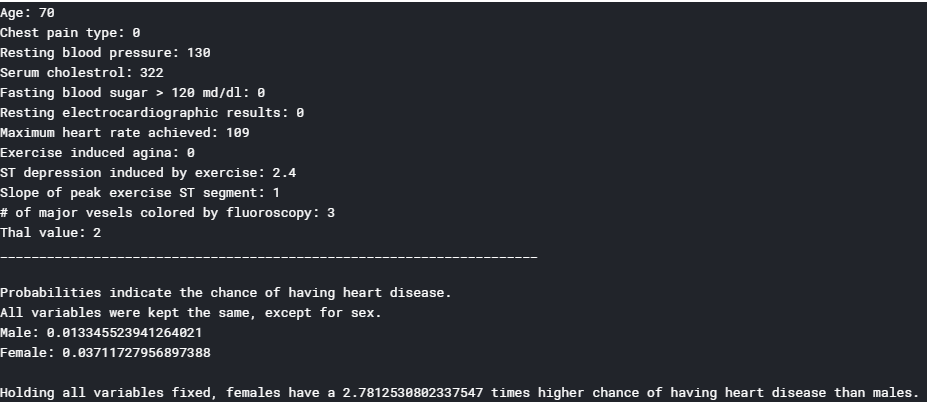

Interesting. Let's see this work on another example.

In [17]:
X_train.iloc[41]

age                         44.0
sex                          1.0
chest pain type              0.0
resting blood pressure     120.0
serum cholestrol           169.0
fasting blood sugar          0.0
resting electro              1.0
max heart rate             144.0
exercise induced angina      1.0
ST depression                2.8
slope                        0.0
colored vessels              0.0
thal                         1.0
Name: 294, dtype: float64

In [18]:
run_interface()

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

Since Kaggle doesn't support input requests,here is an image of the interface:
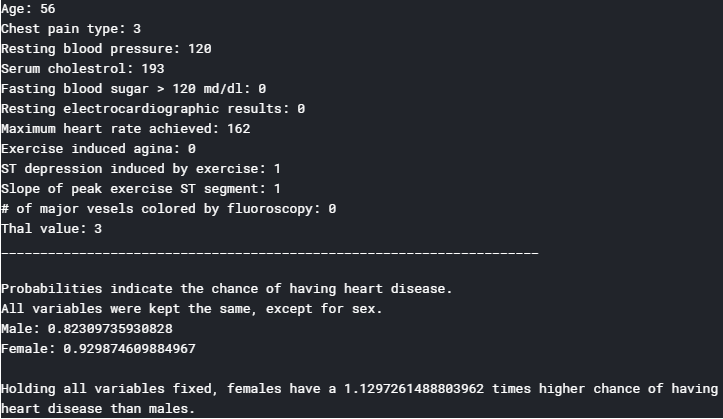

## Sex Differences Across the Dataset

Let's call the female chance divided by the male chance of heart disease x, for conciseness' sake.

Manually entering the values is a hassle. Let's create a distribution plot with all of the values from the dataset.

In [19]:
values = []
sex_vals = [1.0,0.0]

for index in range(len(data)):
    
    pred_vals = []
    
    for sex in sex_vals:
        
        array = []
        array.append(data.iloc[index]['age'])
        array.append(sex)
        for column in data.iloc[index].drop(['age','sex','target']):
            array.append(column)
        
        pred = log.predict_proba(np.array(array).reshape(1,-1))
        pred_vals.append(pred[0][1])
    
    values.append(pred_vals[1]/pred_vals[0])

Text(0.5, 0, 'X Value (Female chance divided by Male chance of heart disease)')

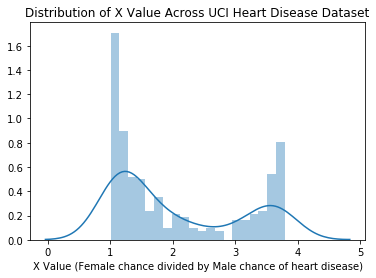

In [20]:
sns.distplot(values,bins=20)
plt.title("Distribution of X Value Across UCI Heart Disease Dataset")
plt.xlabel('X Value (Female chance divided by Male chance of heart disease)')

As predicted, there is no value less than 1, but there are a significant number around that area of 1.0-1.3. This means that in a significant number of cases, sex does not make a huge difference. However, there is an interesting curve shape that ducks in the middle.

---------------------------------------------------------------------------------------

Thanks for spending the time to read my kernel!